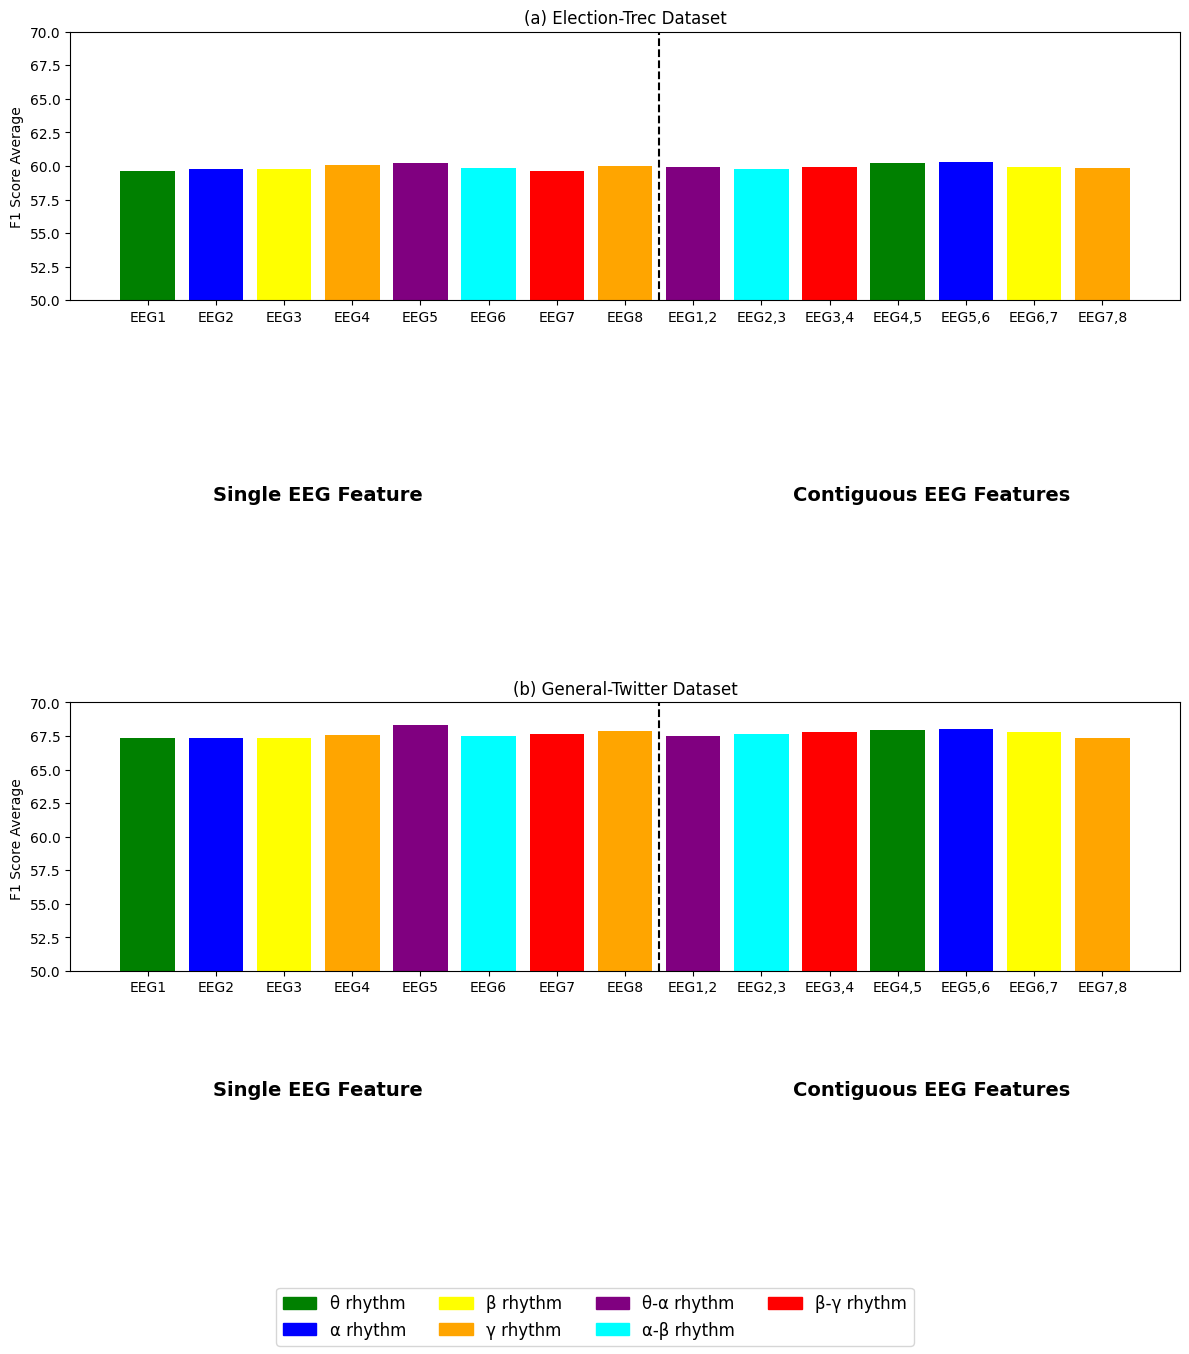

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data input (replace these arrays with your actual data)
features_single = ['EEG1', 'EEG2', 'EEG3', 'EEG4', 'EEG5', 'EEG6', 'EEG7', 'EEG8']
features_contiguous = ['EEG1,2', 'EEG2,3', 'EEG3,4', 'EEG4,5', 'EEG5,6', 'EEG6,7', 'EEG7,8']

# Replace these with your actual data
delta_f1_single_election = [59.65, 59.78, 59.74, 60.04, 60.19, 59.88, 59.65, 59.97]
delta_f1_contiguous_election = [59.96, 59.81, 59.89, 60.19, 60.32, 59.96, 59.84]

delta_f1_single_twitter = [67.32, 67.33, 67.38, 67.54, 68.3, 67.49, 67.64, 67.89]
delta_f1_contiguous_twitter = [67.49, 67.66, 67.77, 67.94, 67.99, 67.78, 67.36]

# Corresponding colors for different rhythms
rhythms_colors = {
    'θ rhythm': 'green',
    'α rhythm': 'blue',
    'β rhythm': 'yellow',
    'γ rhythm': 'orange',
    'θ-α rhythm': 'purple',
    'α-β rhythm': 'cyan',
    'β-γ rhythm': 'red'
}

# Assign colors to each EEG feature based on its rhythm
colors_single = [
    rhythms_colors['θ rhythm'],  # EEG1
    rhythms_colors['α rhythm'],  # EEG2
    rhythms_colors['β rhythm'],  # EEG3
    rhythms_colors['γ rhythm'],  # EEG4
    rhythms_colors['θ-α rhythm'],  # EEG5
    rhythms_colors['α-β rhythm'],  # EEG6
    rhythms_colors['β-γ rhythm'],  # EEG7
    rhythms_colors['γ rhythm']   # EEG8
]

colors_contiguous = [
    rhythms_colors['θ-α rhythm'],  # EEG1,2
    rhythms_colors['α-β rhythm'],  # EEG2,3
    rhythms_colors['β-γ rhythm'],  # EEG3,4
    rhythms_colors['θ rhythm'],  # EEG4,5
    rhythms_colors['α rhythm'],  # EEG5,6
    rhythms_colors['β rhythm'],  # EEG6,7
    rhythms_colors['γ rhythm']   # EEG7,8
]

# Plotting the graphs
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Election-Trec Dataset
ax[0].bar(features_single, delta_f1_single_election, color=colors_single)
ax[0].bar(features_contiguous, delta_f1_contiguous_election, color=colors_contiguous)
ax[0].axvline(x=7.5, color='black', linestyle='--')  # Dashed line separating single and contiguous features
ax[0].set_ylim(50, 70)  # Adjusted y-axis limit
ax[0].set_ylabel('F1 Score Average')
ax[0].set_title('(a) Election-Trec Dataset')
ax[0].text(2.5, 35.5, 'Single EEG Feature', ha='center', va='center', fontsize=14, weight='bold')
ax[0].text(11.5, 35.5, 'Contiguous EEG Features', ha='center', va='center', fontsize=14, weight='bold')

# General-Twitter Dataset
ax[1].bar(features_single, delta_f1_single_twitter, color=colors_single)
ax[1].bar(features_contiguous, delta_f1_contiguous_twitter, color=colors_contiguous)
ax[1].axvline(x=7.5, color='black', linestyle='--')  # Dashed line separating single and contiguous features
ax[1].set_ylim(50,70)  # Adjusted y-axis limit
ax[1].set_ylabel('F1 Score Average ')
ax[1].set_title('(b) General-Twitter Dataset')
ax[1].text(2.5, 41.15, 'Single EEG Feature', ha='center', va='center', fontsize=14, weight='bold')
ax[1].text(11.5, 41.15, 'Contiguous EEG Features', ha='center', va='center', fontsize=14, weight='bold')

# Add the legend for rhythms
rhythm_labels = list(rhythms_colors.keys())
rhythm_handles = [plt.Rectangle((0,0),1,1, color=rhythms_colors[rhythm]) for rhythm in rhythm_labels]
fig.legend(rhythm_handles, rhythm_labels, loc='lower center', ncol=4, fontsize=12)

plt.tight_layout(rect=[0, 0.1, 1, 0.97])  # Adjust layout to make space for the legend

# Save the figure
plt.savefig('delta_f1_comparison.png', dpi=300)  # Saves the figure as a PNG file with 300 DPI resolution

# Show the plot
plt.show()


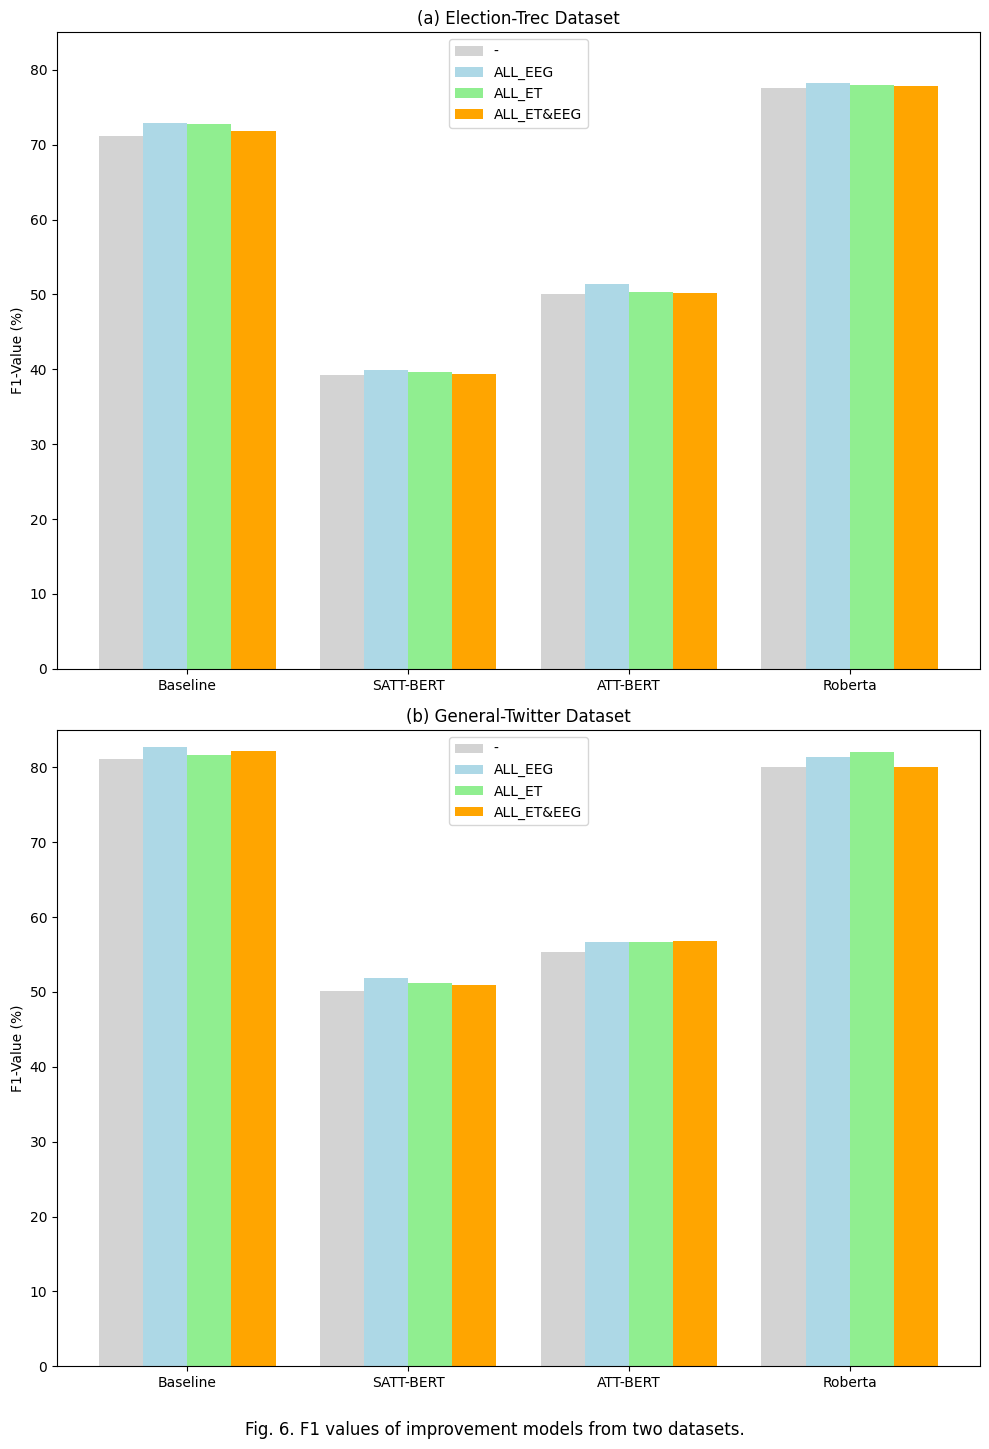

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data input
models = ['Baseline', 'SATT-BERT', 'ATT-BERT', 'Roberta']

# Election-Trec Dataset F1 Scores
f1_base = [71.13, 39.24, 50.05, 77.56]
f1_EEG = [72.9, 39.88, 51.37, 78.24]
f1_ET= [72.79, 39.67, 50.37, 78]
f1_all = [71.86, 39.37, 50.24, 77.84]

# General-Twitter Dataset F1 Scores
f1_base_twitter = [81.08, 50.18, 55.34, 80.08]
f1_EEG_twitter = [82.73, 51.86, 56.69, 81.34]
f1_ET_twitter = [81.62, 51.18, 56.73, 82.05]
f1_all_twitter = [82.16, 50.9, 56.77, 80.08]

x = np.arange(len(models))
width = 0.2

# Plotting Election-Trec Dataset
fig, ax = plt.subplots(2, 1, figsize=(10, 15))

ax[0].bar(x - 1.5 * width, f1_base, width, label='-', color='lightgrey')
ax[0].bar(x - 0.5 * width, f1_EEG, width, label='ALL_EEG', color='lightblue')
ax[0].bar(x + 0.5 * width, f1_ET, width, label='ALL_ET', color='lightgreen')
ax[0].bar(x + 1.5 * width, f1_all, width, label='ALL_ET&EEG', color='orange')

ax[0].set_ylabel('F1-Value (%)')
ax[0].set_title('(a) Election-Trec Dataset')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].set_ylim(0, 85)  # Adjusted the y-limit to accommodate all values
ax[0].legend()

# Plotting General-Twitter Dataset
ax[1].bar(x - 1.5 * width, f1_base_twitter, width, label='-', color='lightgrey')
ax[1].bar(x - 0.5 * width, f1_EEG_twitter, width, label='ALL_EEG', color='lightblue')
ax[1].bar(x + 0.5 * width, f1_ET_twitter, width, label='ALL_ET', color='lightgreen')
ax[1].bar(x + 1.5 * width, f1_all_twitter, width, label='ALL_ET&EEG', color='orange')

ax[1].set_ylabel('F1-Value (%)')
ax[1].set_title('(b) General-Twitter Dataset')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].set_ylim(0, 85)  # Adjusted the y-limit to accommodate all values
ax[1].legend()

# Adjust the layout to provide more space at the bottom
plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# Add the figure caption below the plots
plt.figtext(0.5, 0.01, 'Fig. 6. F1 values of improvement models from two datasets.', ha='center', fontsize=12)

# Save the figure
plt.savefig('f1_values_comparison.png', dpi=300)  # Saves the figure as a PNG file with 300 DPI resolution

# Show the plot
plt.show()
